# Problem 2a

[1.         1.08768482 1.27475488 1.43768624 1.5        1.43768624
 1.27475488 1.08768482 1.         1.08768482 1.27475488 1.43768624
 1.5        1.43768624 1.27475488 1.08768482 1.        ]


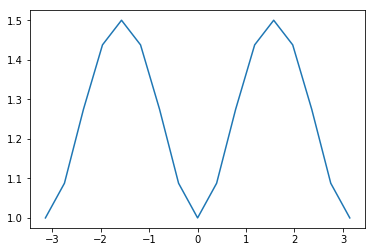

In [28]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# eclipse
lin_x = np.linspace(-np.pi, np.pi, 17)
S_eclipse = np.linalg.norm([[np.cos(lin_x[i]), 1.5 * np.sin(lin_x[i])] for i in range(len(lin_x))], axis=1)
print(S_eclipse)

plt.plot(lin_x, S_eclipse)
plt.show()


# Problem 3

In [50]:
P = np.array([[27, 4, 80],
              [4, 8, 66],
              [26, 27, 93],
              [5, 3, 63],
              [2, 18, 72],
              [9, 10, 68],
              [4, 22, 75],
              [19, 19, 80],
              [19, 19, 80],
              [13, 21, 77],
              [26, 6, 78],
              [28, 15, 88],
              [15, 8, 69],
              [26, 22, 89],
              [5, 29, 80],
              [4, 22, 75]])

# P = data[:, 0:2]

Q = []
for i in range(0, 31, 10):
    for j in range(0, 31, 10):
        Q.append([i, j])

V = []
for q in Q:
    d_qp = np.linalg.norm(P[:, 0:2] - q, axis=1)
    numerator = np.sum(P[:, 2] / d_qp)
    denominator = np.sum(1 / d_qp)
    V.append(numerator / denominator)
    print(q, V[-1])


[0, 0] 72.83867508137199
[0, 10] 73.06584442818838
[0, 20] 74.87215697500845
[0, 30] 76.7941683993503
[10, 0] 73.43140038994018
[10, 10] 71.73914255147785
[10, 20] 76.40249841910732
[10, 30] 77.64866859393938
[20, 0] 76.30027284515728
[20, 10] 76.936573780927
[20, 20] 79.58841523131225
[20, 30] 79.9588752201392
[30, 0] 77.94171332868135
[30, 10] 79.42105671009439
[30, 20] 81.63512167042715
[30, 30] 81.71650295737915


[21.098971206139566, 38.32125534746925, 42.60094856431208, 27.08212133998446, 30.361255996159603, 55.65765341580395, 60.3857572236323, 36.68226475852524, 29.361675688889566, 53.56662123088761, 57.50568363014452, 33.976954403609014, 20.89197587400641, 36.00852823792234, 37.59624220517131, 22.43132004726811]


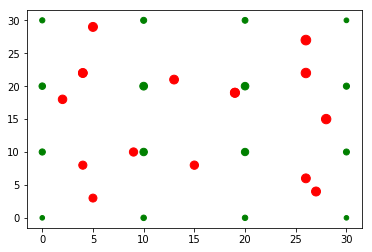

In [107]:
V = []
h = 10
a = 2 * h ** 2
c = -1.5
for q in Q:
    K = 1 / pow((np.sqrt(2 * np.pi) * h), c)
    K *= np.exp(-(np.square(np.linalg.norm(q - P[:, :2], axis=1)) / a))
    v = np.average(K)
    V.append(v)

Q = np.array(Q)
print(V)
plt.scatter(Q[:, 0], Q[:, 1], c='g', s=V)
plt.scatter(P[:, 0], P[:, 1], c='r', s=P[:, 2])
plt.show()


## Problem 3c

The density estimates provide the interpolated values of the unknown grid points.

## Problem 4a


In [140]:
A = [[0, 12.80, 0.64],
     [1, 12.66, 1.16],
     [4, 9.03, 7.61],
     [7, 8.40, 11.06],
     [9, 7.13, 10.75],
     [11, 6.72, 10.88],
     [13, 5.28, 11.01],
     [16, 3.11, 8.85]]

B = [[0, 1.45, 11.27],
     [1, 2.54, 9.37],
     [4, 4.78, 8.92],
     [8, 4.83, 8.99],
     [9, 4.85, 8.98],
     [12, 7.26, 10.67],
     [15, 8.95, 10.37],
     [18, 9.09, 9.33],
     [21, 9.12, 9.33],
     [23, 9.05, 8.99],
     [27, 8.97, 6.56],
     [30, 9.07, 5.77],
     [33, 10.76, 2.88],
     [34, 13.30, 0.16]]

A = np.array(A)
B.reverse()
B = np.array(B)
DTW = np.zeros((A.shape[0] + 1, B.shape[0] + 1))
DTW[:, :] = np.inf
DTW[0, 0] = 0

for i in range(1, DTW.shape[0]):
    for j in range(1, DTW.shape[1]):
        # print(i, j)
        cost = np.linalg.norm(A[i-1, 1:] - B[j-1, 1:])
        DTW[i, j] = cost + min(DTW[i - 1, j],  # insertion
                                   DTW[i, j - 1],  # deletion
                                   DTW[i - 1, j - 1])  # match

# print(DTW)
with open('./ex6/out.csv', 'w+') as f:
    for line in DTW:
        f.write('{}\r\n'.format(",".join(np.char.mod('%f', line))))


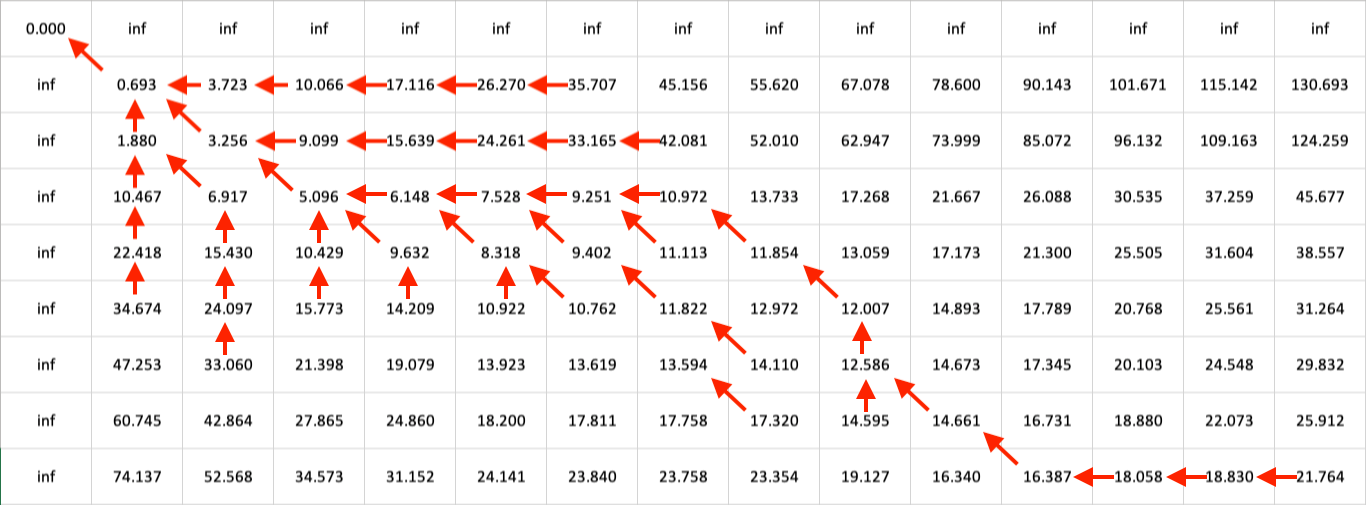

In [141]:
from IPython.display import Image
Image("ex6/mat.png")

## Problem 4b

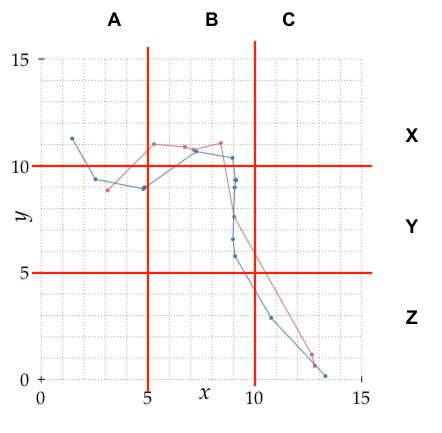

In [145]:
Image("ex6/tile.png")

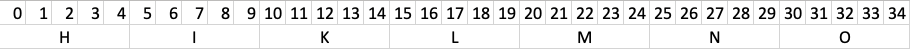

In [151]:
Image("ex6/time.png")

### Trajectory A
CZ:H, CZ:H, BY:H, BX:I, BX:I, BX:K, BX:K, AY:K
### Trajectory B
AX:H, AY:H, AY:H, AY:I, AY:I, BX:K, BX:L, BY:L, BY:M, BY:M, BY:N, BY:O, CZ:O, CZ:O
